**Índice**<a id='toc0_'></a>    
- [Material de Apoio](#toc1_)    
- [Caso 2](#toc2_)    
- [Exercício](#toc3_)    
- [Agrupando Dados](#toc4_)    
  - [Outros detalhes do groupby](#toc4_1_)    
- [Resumo](#toc5_)    
- [Uma breve introdução: como gerar gráficos com o Seaborn](#toc6_)    
  - [Desafio](#toc6_1_)    
  - [Desafio 2](#toc6_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=3
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Material de Apoio](#toc0_)

1. Essa postagem mostra algumas funcionalidades úteis do groupby, e é feita em português: [https://medium.com/data-hackers/8-coisas-que-voc%C3%AA-n%C3%A3o-sabia-sobre-o-pandas-groupby-b2c9033d7034](https://medium.com/data-hackers/8-coisas-que-voc%C3%AA-n%C3%A3o-sabia-sobre-o-pandas-groupby-b2c9033d7034)
2. [Essa postagem em inglês tem conteúdo semelhante, mas inclui uma explicação de como o groupby funciona no início](https://towardsdatascience.com/5-pandas-group-by-tricks-you-should-know-in-python-f53246c92c94)

# <a id='toc2_'></a>[Caso 2](#toc0_)

Em 2017, o MP questionou judicialmente os gastos com saúde do Estado. Segundo o MP, [os investimentos foram realizados abaixo dos limites mínimos estabelecidos por lei](https://oglobo.globo.com/rio/rj-investiu-apenas-6-da-receita-na-saude-ate-fim-de-outubro-dizmp-22191439). Trata-se de uma violação grave com repercussões jurídicas relevantes.

Como parte do seu papel de fiscalização, o MP do Rio de Janeiro usou os dados publicados pelo Estado sobre as previsões e execuções orçamentárias para verificar se os limites estavam sendo respeitados. Os dados estão disponíveis na seguinte URL:

http://bit.ly/3bMquz7

Para recriar os passos do MP, podemos ler o arquivo simplesmente passando a URL como argumento para a função `pd.read_csv`:

In [1]:
import pandas as pd
despesas18 = pd.read_csv("http://bit.ly/3bMquz7")

Qual é o tipo de `despesas18`?

In [2]:
type(despesas18)

pandas.core.frame.DataFrame

Trata-se de um `DataFrame`: uma nova estrutura de dados que alia algumas das vantagens de dicionários a uma série de métodos próprios que facilitam imensamente a vida de quem está analisando dados. A seguir, vemos alguns desses métodos no contexto dos dados do Estado do Rio de Janeiro.

Se quisermos dar uma olhada nos dados que acabamos de baixar, podemos usar o método `.head()`, que mostra apenas as 5 primeiras linhas.

In [3]:
despesas18.head()

,Poder,Elemento,Sub Elemento,Órgão,UO,UG,Credor,Fonte de Recursos,Função,Sub Função,Licitação,Valor Empenhado,Valor Liquidado,Valor Pago
0,Executivo,Outros Serviços de Terceiros - Pessoa Física,NaN,Secretaria de Estado da Casa Civil e Desenvol,Departamento de Trânsito do Estado do Rio de,DEPARTAMENTO DE TRANSITO DO RIO DE JANEIRO,ALEXANDRE CESAR DE SOUZA,Taxas pelo Exercício do Poder de Polícia e por...,Segurança Pública,Administração Geral,DISPENSA,0,0,0
1,Executivo,Diárias - Civil,NaN,Secretaria de Estado de Transportes,Instituto de Pesos e Medidas do Estado do Rio,INSTITUTO DE PESOS E MEDIDAS DO RJ,LUIS ALEXANDRE FERREIRA SILVEIRA,Transferências Voluntárias,Indústria,Administração Geral,NAO APLICAVEL,0,0,0
2,Executivo,Outros Serviços de Terceiros - Pessoa Jurídic,NaN,Secretaria de Estado de Saúde,Fundo Estadual de Saúde,FUNDO ESTADUAL DE SAUDE - FES,BRASIL SUL IND E COM LTDA,Adicional do ICMS - FECP,Saúde,Assistência Hospitalar e Ambulatorial,PREGÃO ELETRÔNICO,0,0,0
3,Executivo,Material de Consumo,NaN,Secretaria de Estado da Casa Civil e Desenvol,Subsecretaria de Estado de Governo,SUBSEC. DE REC. LOGISTICOS - SEFAZ-LOGISTICA,PETROBRAS DISTRIBUIDORA S/A,Ordinários Provenientes de Impostos,Administração,Administração Geral,PREGÃO ELETRÔNICO,0,0,0
4,Executivo,Outros Serviços de Terceiros - Pessoa Jurídic,NaN,Secretaria de Estado de Ciência Tecnologia I,Subsecretaria de Cultura,SECRETARIA DE ESTADO DE CULTURA,NaN,Ordinários Provenientes de Impostos,Cultura,Administração Geral,DISPENSA,0,0,0


Por que não podemos simplesmente dar `print` em `despesas18`? Até podemos, mas, como o arquivo é muito grande, essa parece ser uma má ideia. O atributo `.shape` nos permite ver quantas linhas e colunas um `DataFrame` possui:

In [4]:
despesas18.shape

(99190, 14)

Estamos falando de 99.190 linhas! Não faz sentido imprimirmos todas elas e é quase impossível imaginar que uma pessoa ou um grupo pequeno de pessoas poderia fazer qualquer verificação exaustiva de maneira manual. Mesmo no Excel, é difícil lidar com esse volume de dados.

O `pandas`, porém, facilita a nossa vida. As informações em um `DataFrame` são armazenadas como uma tabela, em **linhas** e **colunas**. 

O atributo `.shape` nos informa quantas linhas (primeiro elemento) e quantas colunas (segundo elemento) um `DataFrame` contém. `DataFrames` podem ter seus elementos acessáveis através de índices.

No caso anterior, verificamos como fazer as coisas mais básicas com o Pandas, podemos seguir adiante com o nosso objetivo de investigar apenas os gastos com saúde e sua relação com os demais gastos do governo.

Uma avaliação preliminar nos mostra que essa informação está contida na coluna "Função". 

O Pandas possui um método que vai ser bastante útil na hora de trabalhar com dados do direito: `.value_counts()`, que retorna o **número de ocorrências que cada categoria possui**.

In [5]:
despesas18["Função"].value_counts()

Educação                 30536
Segurança Pública        12789
Saúde                    11429
Transporte                5669
Essencial à Justiça       5416
Agricultura               4918
Administração             4476
Assistência Social        2720
Judiciária                2428
Comércio e Serviços       2408
Gestão Ambiental          2326
Previdência Social        2175
Legislativa               2113
Indústria                 1960
Cultura                   1587
Ciência e Tecnologia      1586
Encargos Especiais        1138
Urbanismo                  731
Direitos da Cidadania      644
Desporto e Lazer           528
Trabalho                   520
Habitação                  518
Organização Agrária        230
Saneamento                 188
Comunicações               157
Name: Função, dtype: int64

De pronto, essa função nos informa que a rúbrica mais frequente é referente a "Educação", seguida por "Segurança Pública" e "Saúde". Mas isso não é suficiente para responder as perguntas que propusemos anteriormente. Para tal, precisamos saber qual **valor** foi efetivamente pago para cada uma dessas rúbricas.

Para descobrir isso, precisamos pegar a soma dos montantes registrados nas 11.429 linhas dedicadas à saúde e comparar o valor resultante com o gasto global. 

Para isso, podemos usar duas ferramentas: o método `.sum()`, próprio das `Series`, estrutura de dados contida em cada coluna de um `DataFrame`, e a indexação lógica, onde podemos escolher subseções de um `DataFrame` com base em condições lógicas.

Antes disso, porém, precisamos transformar a coluna "Valor Pago" em uma coluna numérica. Se acessarmos os tipos das colunas contidas em `despesas18`, veremos que, por enquanto, "Valor Pago" é do tipo `object`:

In [6]:
despesas18.dtypes

Poder                object
Elemento             object
Sub Elemento         object
Órgão                object
UO                   object
UG                   object
Credor               object
Fonte de Recursos    object
Função               object
Sub Função           object
Licitação            object
Valor Empenhado      object
Valor Liquidado      object
Valor Pago           object
dtype: object

Vamos imprimir os 5 primeiros valores de "Valor Pago" para darmos uma olhada em seu conteúdo.

In [7]:
despesas18.iloc[0:5]["Valor Pago"]

0    0
1    0
2    0
3    0
4    0
Name: Valor Pago, dtype: object

Isso não foi muito informativo... Quando o valor é 0 - e aparentemente o valor é 0 na maioria dos casos - nós não temos como saber porque a coluna não foi interpretada pelo Python como do tipo `float`. Podemos usar a **indexação lógica** para resolver esse problema. Sabemos que existem valores pagos pelo Estado. Portanto, nem todas as colunas podem ter valor = 0. Para saber quais valores estão preenchidos, portanto, basta *eliminar* o caracter "0" dessa coluna e ver o que permanece preenchido!

Podemos filtrar a tabela utilizando o `query`. **Note que como a coluna é do tipo object, ela armazena valores em texto. Assim precisamos delimitar o 0 como string dentro do query**.

Vamos nos restringir a coluna de interesse.

In [8]:
despesas18.query("`Valor Pago` != '0'")["Valor Pago"]

360           112440
361      15716395,53
365         310484,5
366         38402,37
390        209623,99
            ...     
99185            NaN
99186            NaN
99187            NaN
99188            NaN
99189            NaN
Name: Valor Pago, Length: 54061, dtype: object



O que acontece se tentarmos simplesmente transformar o valor pago como está acima em `float`? Em tese, isso pode ser feito para cada célula através do método `.astype()`. 

In [11]:
despesas18["Valor Pago Float"] = despesas18["Valor Pago"].astype("float")

ValueError: could not convert string to float: '15716395,53'

A mensagem de erro aponta para o problema: o Python/Pandas não sabe como lidar com vírgulas como separador de decimais!

Precisamos de 2 passos, portanto: primeiro, precisamos substituir as vírgulas por pontos e depois transformar a variável em float:

In [9]:
despesas18["Valor Pago Float"] = despesas18["Valor Pago"].str.replace(",", ".")

despesas18["Valor Pago Float"] = despesas18["Valor Pago Float"].astype("float")

Agora, podemos confirmar o tipo da nova variável invocando mais uma vez o atributo `.dtypes`:

In [10]:
despesas18.dtypes

Poder                 object
Elemento              object
Sub Elemento          object
Órgão                 object
UO                    object
UG                    object
Credor                object
Fonte de Recursos     object
Função                object
Sub Função            object
Licitação             object
Valor Empenhado       object
Valor Liquidado       object
Valor Pago            object
Valor Pago Float     float64
dtype: object

A coluna "Valor Pago Float" não é mais do tipo `object`, agora ela é um novo tipo de `float`: `float64`. Isso tem a ver com o número de bits que um número pode ocupar na memória do computador, mas isso não é importante.

O importante é que podemos usar essa variável, aliada ao método `.sum()` para verificar se o Estado respeitou o investimento mínimo legal em saúde no ano de 2018.

In [11]:
valor_pago_total = despesas18["Valor Pago Float"].sum()
valor_pago_total

39367403957.09

Para calcular qual valor foi gasto especificamente com saúde, podemos usar o índice lógico:

In [12]:
valor_pago_saude = despesas18.query("Função == 'Saúde'")["Valor Pago Float"].sum()
valor_pago_saude

2424204722.47

In [13]:
valor_pago_saude / valor_pago_total

0.0615789835954729

Ou poderiamos fazer a conta direto das colunas

In [14]:
despesas18.query("Função == 'Saúde'")["Valor Pago Float"].sum() / despesas18["Valor Pago Float"].sum()

0.0615789835954729

In [15]:
despesas18.query("Função == 'Saúde' and `Valor Pago Float` != 0")["Valor Pago Float"].sum() / despesas18.query("`Valor Pago Float` != 0")["Valor Pago Float"].sum()

0.0615789835954729

Segundo o Ministério Público, o valor mínimo a ser investido seria de 12%. Claramente, o Estado não parece ter cumprido com esse requisito legal, haja vista que apenas 6% do valor efetivamente pago teve como destino essa função.

# <a id='toc3_'></a>[Exercício](#toc0_)

O que aconteceria se levássemos em conta não o valor pago e sim o valor liquidado? E se levássemos em conta o valor empenhado? Esses são os desafios dessa aula! Crie variáveis chamadas "razao_liquidado" e "razao_empenhado" com suas respostas.

In [19]:
#implemente seu código aqui

In [ ]:
#rode essa célula para verificar se você acertou o % liquidado na saúde
from correcoes import aula10_ex1
aula10_ex1(despesas18, razao_liquidado)

In [21]:
#implemente seu código aqui

In [ ]:
#rode essa célula para verificar se você acertou o % empenhado na saúde
from correcoes import aula10_ex2
aula10_ex2(despesas18, razao_empenhado)

# <a id='toc4_'></a>[Agrupando Dados](#toc0_)

Uma maneira interessante de colocar esses dados em perspectiva é verificar qual é o % do orçamento gasto com outras funções. Mas seria extremamente chato fazer essa conta função para cada função, além de manualmente trabalhoso. 

Uma opção seria usar um `for` loop, mas o Pandas nos fornece um método elegante para fazer esse tipo de operação: o método `groupby`.

In [16]:
funcoes_pagas = despesas18.groupby("Função")["Valor Pago Float"].sum()

A ideia da sintaxe é: `dataframe.groupby("coluna_com_valor_pelo_qual_agrupar")["coluna_com_valores"].metodo_agrupamento()`.

Como resultado recebemos uma variável do tipo `pd.Series`.

In [17]:
funcoes_pagas

Função
Administração            1.607817e+09
Agricultura              2.455236e+08
Assistência Social       2.440759e+08
Ciência e Tecnologia     7.515062e+07
Comunicações             3.664972e+06
Comércio e Serviços      1.646209e+08
Cultura                  7.532741e+07
Desporto e Lazer         1.843662e+07
Direitos da Cidadania    5.680392e+07
Educação                 4.098150e+09
Encargos Especiais       2.174700e+09
Essencial à Justiça      1.685453e+09
Gestão Ambiental         1.565200e+08
Habitação                4.750836e+07
Indústria                6.326317e+07
Judiciária               3.094868e+09
Legislativa              9.244184e+08
Organização Agrária      6.918813e+06
Previdência Social       1.439876e+10
Saneamento               5.603955e+07
Saúde                    2.424205e+09
Segurança Pública        6.674909e+09
Trabalho                 9.293780e+06
Transporte               7.022514e+08
Urbanismo                3.587235e+08
Name: Valor Pago Float, dtype: float64

Podemos ordenar os valores em `funcoes_pagas` através do método `.sort_values()`:

In [18]:
funcoes_pagas.sort_values(ascending=False)

Função
Previdência Social       1.439876e+10
Segurança Pública        6.674909e+09
Educação                 4.098150e+09
Judiciária               3.094868e+09
Saúde                    2.424205e+09
Encargos Especiais       2.174700e+09
Essencial à Justiça      1.685453e+09
Administração            1.607817e+09
Legislativa              9.244184e+08
Transporte               7.022514e+08
Urbanismo                3.587235e+08
Agricultura              2.455236e+08
Assistência Social       2.440759e+08
Comércio e Serviços      1.646209e+08
Gestão Ambiental         1.565200e+08
Cultura                  7.532741e+07
Ciência e Tecnologia     7.515062e+07
Indústria                6.326317e+07
Direitos da Cidadania    5.680392e+07
Saneamento               5.603955e+07
Habitação                4.750836e+07
Desporto e Lazer         1.843662e+07
Trabalho                 9.293780e+06
Organização Agrária      6.918813e+06
Comunicações             3.664972e+06
Name: Valor Pago Float, dtype: float64

Também podemos impedir o Python de usar notação científica pedindo o valor gasto com cada uma das funções em milhões de reais:

In [19]:
funcoes_pagas.sort_values(ascending = False) / 1000000

Função
Previdência Social       14398.761171
Segurança Pública         6674.908626
Educação                  4098.149843
Judiciária                3094.867999
Saúde                     2424.204722
Encargos Especiais        2174.700350
Essencial à Justiça       1685.452792
Administração             1607.817429
Legislativa                924.418409
Transporte                 702.251428
Urbanismo                  358.723511
Agricultura                245.523609
Assistência Social         244.075927
Comércio e Serviços        164.620931
Gestão Ambiental           156.519991
Cultura                     75.327413
Ciência e Tecnologia        75.150619
Indústria                   63.263170
Direitos da Cidadania       56.803922
Saneamento                  56.039546
Habitação                   47.508365
Desporto e Lazer            18.436619
Trabalho                     9.293780
Organização Agrária          6.918813
Comunicações                 3.664972
Name: Valor Pago Float, dtype: float64

No final das contas, o investimento abaixo do mínimo em saúde está justificado? Ou existem outras rúbricas que poderiam ser reduzidas?

## <a id='toc4_1_'></a>[Outros detalhes do groupby](#toc0_)

Se quisermos um `DataFrame` e não uma `series` podemos alterar o resultado com o argumento `as_index` que instrui que o que será usado para o agrupamento não seja usado como índice do `DataFrame`.

In [20]:
despesas18.groupby("Função", as_index=False)["Valor Pago Float"].sum()

,Função,Valor Pago Float
0,Administração,1.607817e+09
1,Agricultura,2.455236e+08
2,Assistência Social,2.440759e+08
3,Ciência e Tecnologia,7.515062e+07
4,Comunicações,3.664972e+06
5,Comércio e Serviços,1.646209e+08
6,Cultura,7.532741e+07
7,Desporto e Lazer,1.843662e+07
8,Direitos da Cidadania,5.680392e+07
9,Educação,4.098150e+09


Também podemos fazer agrupamento por múltiplas colunas, a ideia é semelhante a de selecionar várias colunas: em vez de passar uma string com o nome da coluna para o `groupby` devemos passar uma lista com o nome das colunas que queremos usar.

In [25]:
despesas18.groupby(["Poder", "Fonte de Recursos"], as_index=False)['Valor Pago Float'].sum().head()

,Poder,Fonte de Recursos,Valor Pago Float
0,Executivo,Adicional do ICMS - FECP,1.480718e+09
1,Executivo,Alienação de Bens,0.000000e+00
2,Executivo,Compensação Financeira pela Exploração de Petr...,1.032864e+09
3,Executivo,Contratos Intraorçamentários Gestão de Saúde,2.098283e+08
4,Executivo,Contribuição de Intervenção no Domínio Econômi...,3.963611e+07


E se quisermos fazer operações de agrupamento em múltiplas colunas, ou ainda, múltiplas operações na mesma coluna?

Uma opção é fazê-las individualmente e juntá-las depois com o `merge`, nosso próximo tópico. Outra opção é usar o método `.agg` junto ao groupby. Veja a descrição e os exemplos [na documentação do pandas](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html).

Podemos fazer essas coisas separado, mas vamos montar um groupby complexo para exeplo. Queremos a soma e maior pagamento feito por Poder e o número de funções que cada um gastou.

In [26]:
# para facilitar leitura do código vamos criar um dicionario separado
group_functions = {"Valor Pago Float": ["sum", "max"], "Função": ["nunique"]}

despesas18.groupby(["Poder"], as_index=False).agg(group_functions)

Poder Valor Pago Float                Função
                                   sum           max nunique
0           Executivo     3.437531e+10  1.929584e+09      23
1          Judiciário     3.094868e+09  7.052589e+08       1
2         Legislativo     9.244184e+08  1.585384e+08       1
3  Ministério Público     9.728032e+08  3.595991e+08       1

# <a id='toc5_'></a>[Resumo](#toc0_)

* Vimos como ler arquivos processáveis usando Pandas (o procedimento que usamos para ler arquivos .csv pode ser replicado para arquivos .xlsx);
* Aprendemos a usar o Pandas para começar a fazer análise de dados.
* Conseguimos gerar as estatísticas descritivas básicas a respeito dos gastos do Estado por função.

# <a id='toc6_'></a>[Uma breve introdução: como gerar gráficos com o Seaborn](#toc0_)

Mais a frente do curso iremos discutir com calma visualização de dados. Contudo, pode ser interessante ter alguma ideia de como gerar alguns gráficos sobre os dados que estamos explorando. 

Em muitos sentidos, a comunicação dos dados é tão importante quanto as inferências que conseguimos extrair deles. Nesse contexto, nada ajuda mais que um gráfico. Se uma imagem vale por mil palavras, um gráfico vale por pelo menos dez tabelas.

A principal biblioteca de visualização de dados que vamos utilizar ao longo do curso se chama `Seaborn`. O primeiro passo para usarmos o `Seaborn`, naturalmente, é realizar a importação do pacote com sua notação canônica.

In [32]:
import seaborn as sns

%matplotlib inline

    OBS: a linha `%matplotlib inline` é específica do Jupyter Notebook e simplesmente diz para o programa que os gráficos devem ser apresentados na célula de resposta.

Uma das formas mais comuns e úteis de apresentar informações quantitativas visualmente é o **gráfico de barras**. Ele permite que possamos comparar quantidades de maneira rápida e intuitiva. Um bom uso do gráfico de barras, por exemplo, é mostrar quais foram as funções com mais dinheiro pago e qual é a diferença entre elas.

Um dos argumentos apresentados pelo Governo do Estado em contraposição ao MP foi o de que o Estado atravessava importante e notória crise fiscal. Se o MP quer contra-argumentar com dados, uma forma eficiente é mostrar que os gastos com outras funções foram elevados. Representar essa discrepância visualmente é uma maneira eficiente de fazer esse ponto.

In [33]:
funcoes_pagas.head()

Função
Administração           1.607817e+09
Agricultura             2.455236e+08
Assistência Social      2.440759e+08
Ciência e Tecnologia    7.515062e+07
Comunicações            3.664972e+06
Name: Valor Pago Float, dtype: float64

Em primeiro lugar, vamos usar o próprio Pandas para gerar a visualização. Isso é possível usando o método `.plot.bar()`, nativo de DataFrames. Mas antes, precisamos transformar `funcoes_pagas` em um DataFrame, já que atualmente ele é uma `Series`.

In [34]:
type(funcoes_pagas)

pandas.core.series.Series

In [35]:
funcoes_pagas_df = pd.DataFrame(funcoes_pagas)
funcoes_pagas_df.head()

,Valor Pago Float
Função,
Administração,1.607817e+09
Agricultura,2.455236e+08
Assistência Social,2.440759e+08
Ciência e Tecnologia,7.515062e+07
Comunicações,3.664972e+06


`funcoes_pagas_df` já é um DataFrame, mas uma das informações interessantes (a função) está guardada no índice. Muito embora isso possa ser útil para muitas coisas, essa configuração não é a ideal dada a sintaxe que vai ser utilizada nos gráficos. Para alterar isso e guardar "Função" como uma coluna, basta chamarmos o método `.reset_index()`, com o argumento `inplace` como verdadeiro:

In [36]:
funcoes_pagas_df.reset_index(inplace=True)
funcoes_pagas_df.head()

,Função,Valor Pago Float
0,Administração,1.607817e+09
1,Agricultura,2.455236e+08
2,Assistência Social,2.440759e+08
3,Ciência e Tecnologia,7.515062e+07
4,Comunicações,3.664972e+06


Agora, para fazer um gráfico de barras usando o Pandas, basta chamarmos `.plot.bar()` dando os argumentos referentes aos eixos X e Y:

<AxesSubplot: xlabel='Função'>

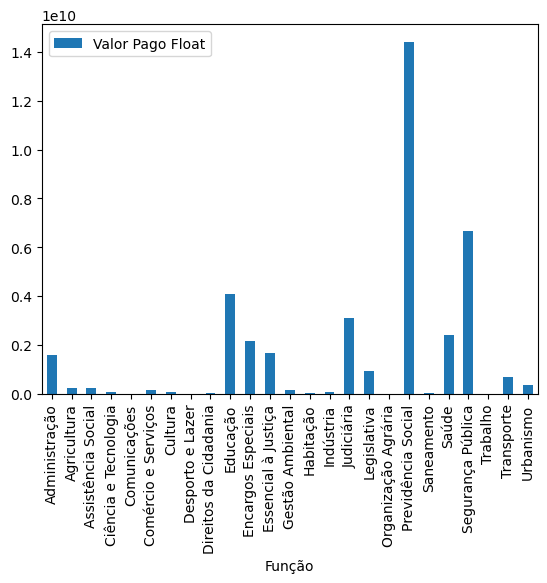

In [39]:
funcoes_pagas_df.plot.bar(x = "Função", y = "Valor Pago Float")

O gráfico é bastante simplificado e esteticamente, não é muito bonito. Para fazer o mesmo gráfico usando o `seaborn`, basta usarmos a função `barplot()`:

<AxesSubplot: xlabel='Função', ylabel='Valor Pago Float'>

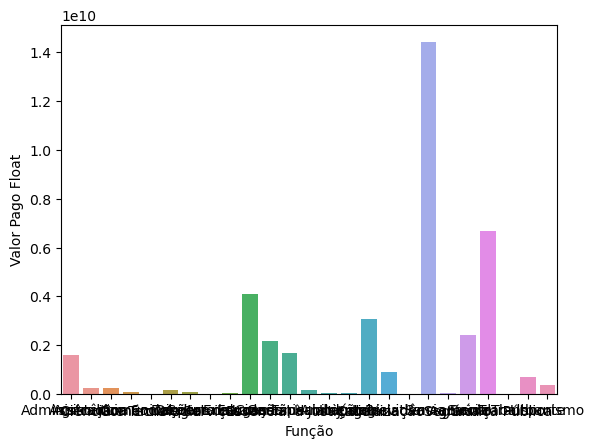

In [40]:
sns.barplot(x = "Função", y = "Valor Pago Float", data = funcoes_pagas_df)

<span style="color:red"> *O gráfico apresenta os mesmos resultados, porém com cores diferentes para cada barra e sem podermos ler o que está escrito em cada função no eixo x.*

Uma primeira reação é notar que o gráfico está ainda mais feio! Por que usar o `seaborn` ao invés do próprio Pandas?

Uma vantagem do seaborn é a maior quantidade de opções. Se quisermos mudar a cor das barras para azul claro, por exemplo, podemos fazer isso introduzindo um único argumento.

<AxesSubplot: xlabel='Função', ylabel='Valor Pago Float'>

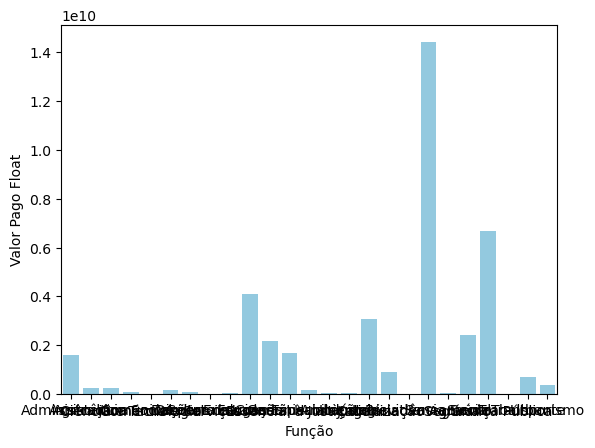

In [41]:
sns.barplot(x = "Função", y = "Valor Pago Float", data = funcoes_pagas_df, color = "skyblue")

Tanto o Pandas quanto o Seaborn, "por trás dos panos", usam a mesma biblioteca, chamada `matplotlib`. Infelizmente, quando queremos alterar aspectos que não constam da lista de argumentos aceitos pelas funções do Seaborn, precisamos fazer chamados manuais a essa função.

Assim, se queremos alterar o ângulo com o qual são apresentados os nomes das funções, podemos fazer isso usando esse módulo, seja importando ele diretamente (canonicamente `from matplotlib import pyplot as plt`), seja usando algum dos métodos que o pacote implementa em objetos reconhecidos como gráficos, como fazemos abaixo com o método `set_xticklabels`.

[Text(0, 0, 'Administração'),
 Text(1, 0, 'Agricultura'),
 Text(2, 0, 'Assistência Social'),
 Text(3, 0, 'Ciência e Tecnologia'),
 Text(4, 0, 'Comunicações'),
 Text(5, 0, 'Comércio e Serviços'),
 Text(6, 0, 'Cultura'),
 Text(7, 0, 'Desporto e Lazer'),
 Text(8, 0, 'Direitos da Cidadania'),
 Text(9, 0, 'Educação'),
 Text(10, 0, 'Encargos Especiais'),
 Text(11, 0, 'Essencial à Justiça'),
 Text(12, 0, 'Gestão Ambiental'),
 Text(13, 0, 'Habitação'),
 Text(14, 0, 'Indústria'),
 Text(15, 0, 'Judiciária'),
 Text(16, 0, 'Legislativa'),
 Text(17, 0, 'Organização Agrária'),
 Text(18, 0, 'Previdência Social'),
 Text(19, 0, 'Saneamento'),
 Text(20, 0, 'Saúde'),
 Text(21, 0, 'Segurança Pública'),
 Text(22, 0, 'Trabalho'),
 Text(23, 0, 'Transporte'),
 Text(24, 0, 'Urbanismo')]

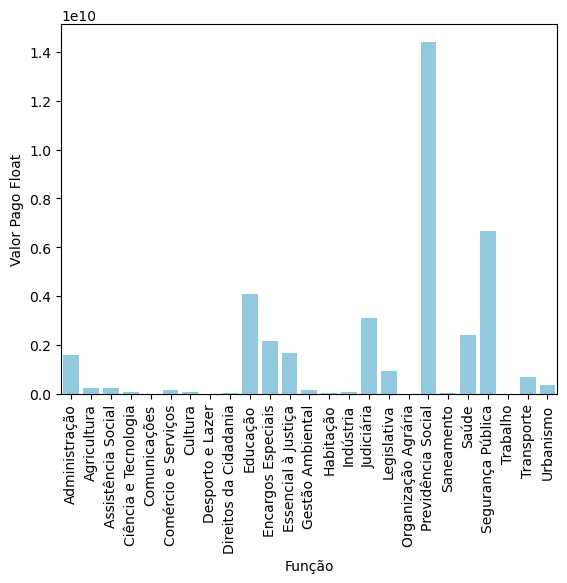

In [42]:
bars = sns.barplot(x = "Função", y = "Valor Pago Float", data = funcoes_pagas_df, color = "skyblue")

bars.set_xticklabels(labels = funcoes_pagas_df["Função"], rotation = 90)

Tanto no Pandas quanto no Seaborn, esse gráfico apresenta alguns problemas:

1) ele não está ordenado;

2) ele tem um excesso de barras.

Para resolver esses dois problemas, vamos ordenar o dataframe (perceba que as barras estão na mesma ordem que no dataframe) por valor e usar `.head()` para plotar apenas as 5 funções com mais gastos.

[Text(0, 0, 'Previdência Social'),
 Text(1, 0, 'Segurança Pública'),
 Text(2, 0, 'Educação'),
 Text(3, 0, 'Judiciária'),
 Text(4, 0, 'Saúde')]

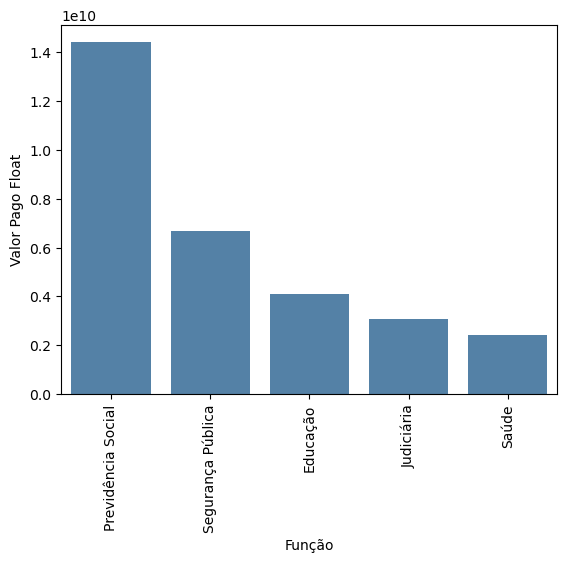

In [43]:
# por padrão, o Pandas ordena em ordem crescente. Quando queremos os top 5, precisamos ordenar por ordem decrescente.
funcoes_pagas_df.sort_values("Valor Pago Float", ascending=False, inplace=True)

bars = sns.barplot(x = "Função", y = "Valor Pago Float", data = funcoes_pagas_df.head(), color = "steelblue")

# se esquecermos de adicionar .head() aos labels, teremos um excesso de labels
bars.set_xticklabels(labels = funcoes_pagas_df.head()["Função"], rotation = 90)

O gráfico acima ainda está longe de estar pronto. Algumas coisas que precisariam ser ajustadas: falta acertar os nomes dos eixos, adicionar um título, alterar a forma de apresentação dos valores de notação científica para algo que advogados entendem, adicionar outros ajustes estéticos...

Mas todas essas coisas serão objeto de aulas posteriores. A ideia, neste momento, é apenas introduzir duas maneiras de visualizar graficamente os dados.



## <a id='toc6_1_'></a>[Desafio](#toc0_)

Se queremos dialogar diretamente com a alegação do Ministério Público, talvez uma ideia melhor fosse que as barras representassem o percentual de gastos com cada função. Para isso, poderíamos criar uma nova coluna no DataFrame que contivesse essa informação e plotar o gráfico com base nela.


## <a id='toc6_2_'></a>[Desafio 2](#toc0_)

Fizemos o gráfico para os valores efetivamente pagos. Faça o gráfico referente à **diferença** entre os valores empenhados e pagos.
